### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [36]:
data = pd.read_csv('autos.csv')

In [37]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [38]:
data.tail()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200
241189,bmw,m_reihe,limousine,manuell,benzin,nein,320,50000,31,28990


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


Нет пустых значений

In [40]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

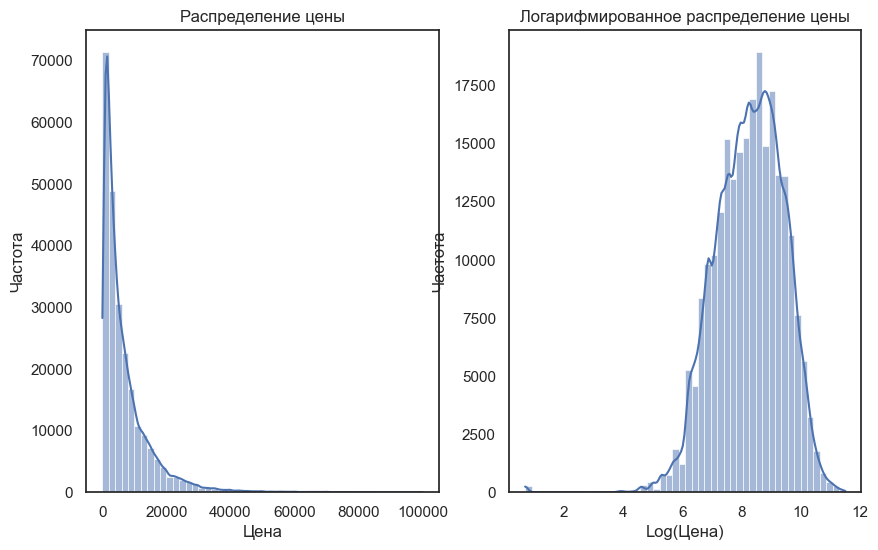

In [41]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['price']), bins=50, kde=True)
plt.title('Логарифмированное распределение цены')
plt.xlabel('Log(Цена)')
plt.ylabel('Частота')
plt.show()

Нижняя граница: -9123.50
Верхняя граница: 19872.50
Найдено выбросов: 15617
6.47% от данных


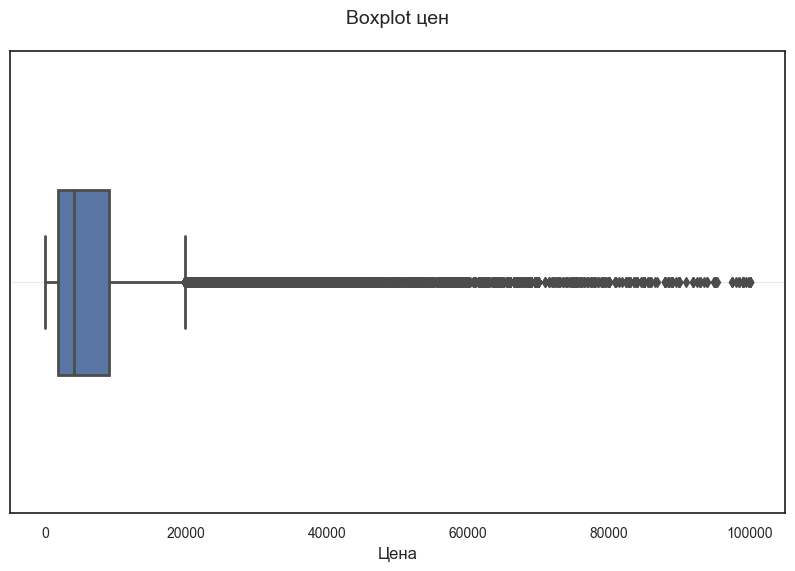

In [42]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x=data['price'], width=0.4, fliersize=5, linewidth=2)
plt.title('Boxplot цен', fontsize=14, pad=20)
plt.xlabel('Цена', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', alpha=0.4)

outliers_mask = (data['price'] < lower_bound) | (data['price'] > upper_bound)
n_outliers = outliers_mask.sum()
percent_outliers = n_outliers / len(data) * 100

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")
print(f"Найдено выбросов: {n_outliers}")
print(f"{percent_outliers:.2f}% от данных")

Выбросы будут заменены на граничные значения (не потеряем большое число данных + модель не будет так сильно склонна к переобучению)

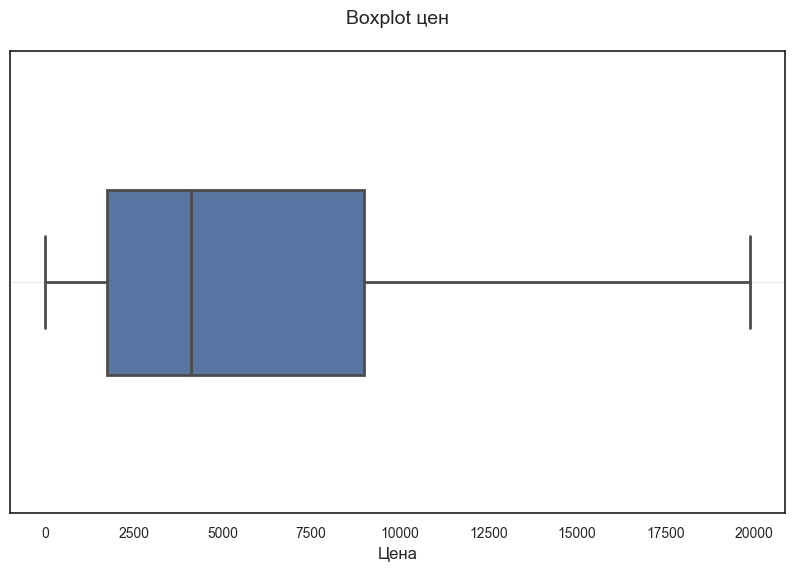

In [43]:
data['price'] = data['price'].clip(lower=0, upper=upper_bound) # Нижняя цена не может быть отрицательной

plt.figure(figsize=(10, 6))

boxplot = sns.boxplot(x=data['price'], width=0.4, fliersize=5, linewidth=2)
plt.title('Boxplot цен', fontsize=14, pad=20)
plt.xlabel('Цена', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', alpha=0.4)

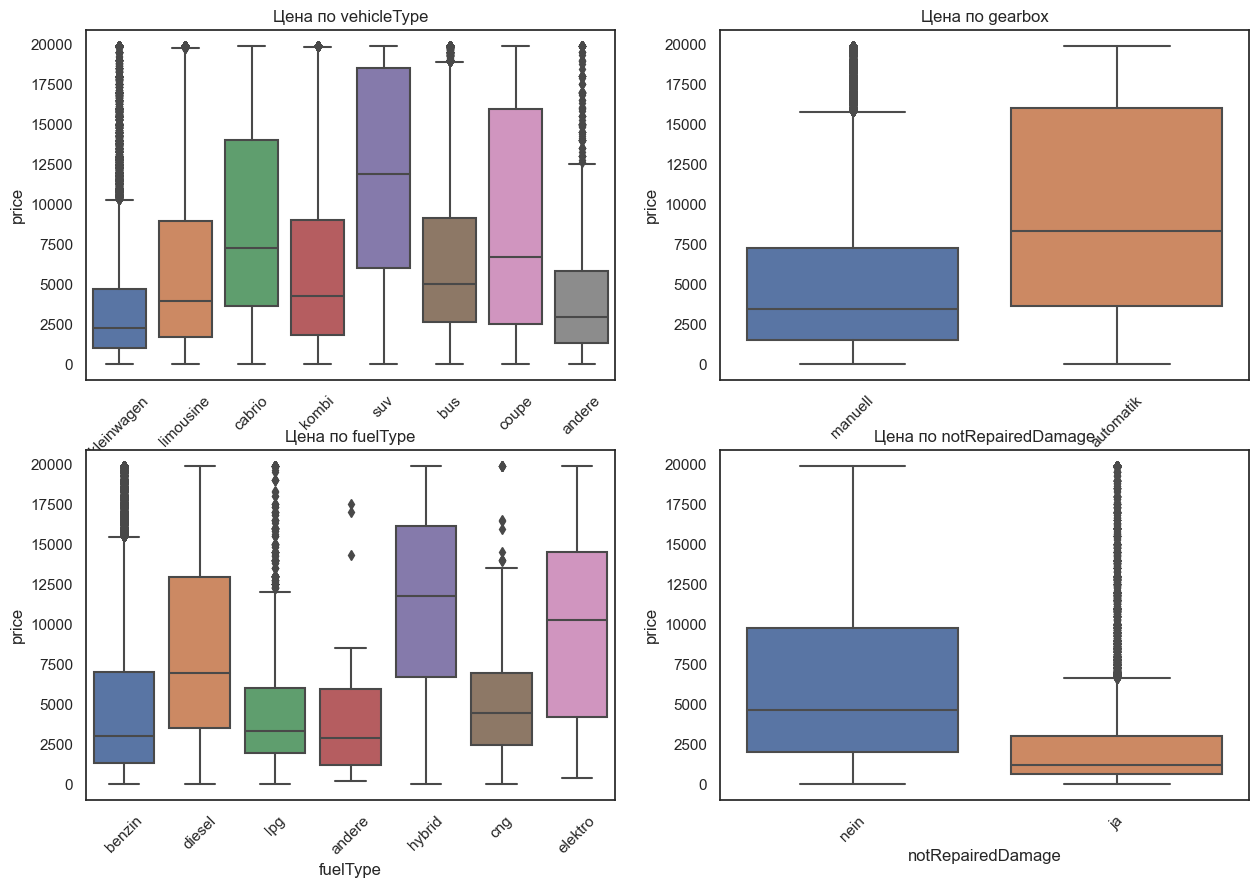

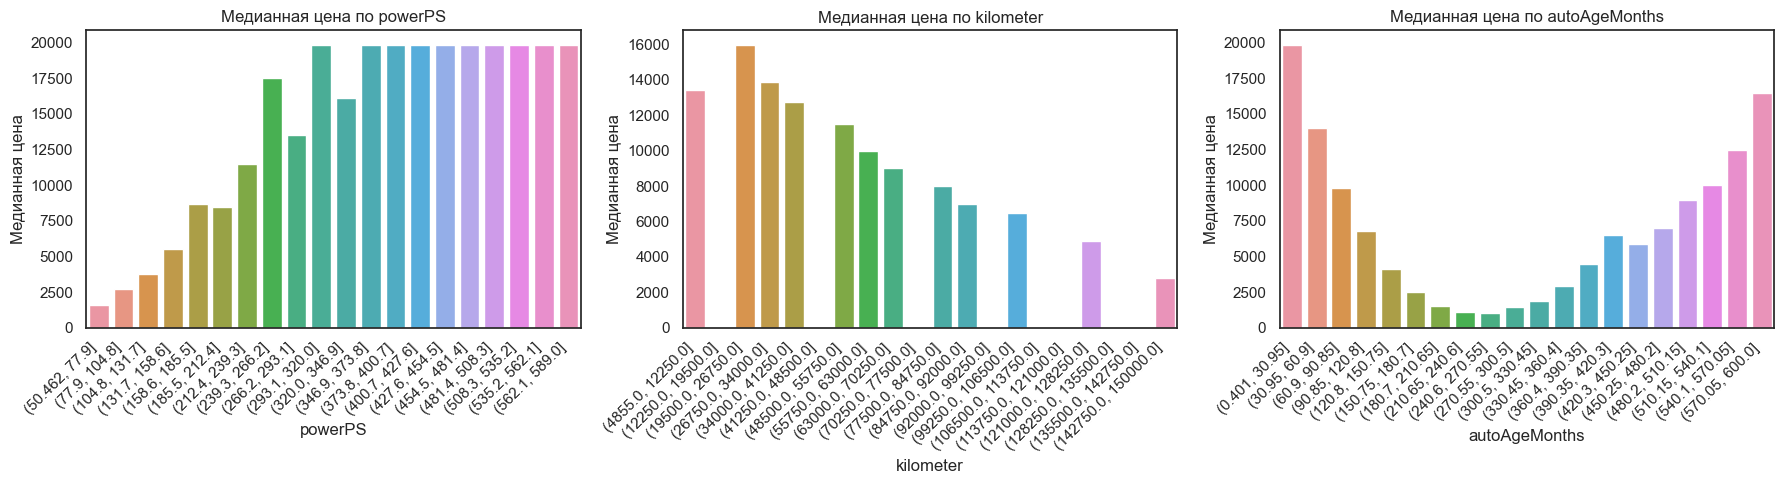

In [44]:
categorical = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['brand', 'model']

sns.set(style="white")

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=col, y='price')
    plt.title(f'Цена по {col}', fontsize=12)
    plt.xticks(rotation=45)

plt.show()

plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric, 1):
    plt.subplot(1, 3, i)
    
    binned = pd.cut(data[col], bins=20)
    bin_means = data.groupby(binned, observed=False)['price'].median().reset_index()
    
    sns.barplot(
        x=bin_means[col].astype(str),
        y=bin_means['price']
    )
    
    plt.title(f'Медианная цена по {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Медианная цена')

plt.tight_layout()
plt.show()

1. vehicleType - kleinwagen и andere будут объединены в новое значение + OHE
2. gearbox - OHE
3. fuelType - Target Encoding
4. notRepairedDamage - OHE
5. powerPS - log1p + бинаризация + OHE
6. kilometer - бинаризация + OHE
7. autoAgeMonths - sqrt

In [45]:
data.columns

Index(['brand', 'model', 'vehicleType', 'gearbox', 'fuelType',
       'notRepairedDamage', 'powerPS', 'kilometer', 'autoAgeMonths', 'price'],
      dtype='object')

In [46]:
data['vehicleType'] = data['vehicleType'].replace({'kleinwagen': 'other', 'andere': 'other'})
data = pd.get_dummies(data, columns=['vehicleType'], prefix='vt', drop_first=True)

if 'gearbox' in data.columns:
    data['transmission_automatic'] = (data['gearbox'] == 'automatik').astype(int)
else:
    data['transmission_automatic'] = 0

if 'notRepairedDamage' in data.columns:
    data['has_unrepaired_damage'] = (data['notRepairedDamage'] == 'ja').astype(int)
else:
    data['has_unrepaired_damage'] = 0

# Функция для сглаженного target encoding
def smoothed_target_encoding(df, column, target_column='price', smoothing_weight=100):
    global_mean = df[target_column].mean()
    grouped = df.groupby(column)[target_column].agg(['count', 'mean'])
    smoothed = (grouped['count'] * grouped['mean'] + smoothing_weight * global_mean) / (grouped['count'] + smoothing_weight)
    return smoothed

# Применение сглаженного target encoding для fuelType
fuel_type_encoded = smoothed_target_encoding(data, 'fuelType')
data['fuelType_encoded'] = data['fuelType'].map(fuel_type_encoded)
data['log_power'] = np.log1p(data['powerPS'])  
data['power_quantiles'] = pd.qcut(data['powerPS'], q=5, labels=False, duplicates='drop')  
data['inverse_km'] = data['kilometer'].max() - data['kilometer']
data['sqrt_age_months'] = np.sqrt(data['autoAgeMonths'])

print("Колонки после добавления новых признаков:", list(data.columns))

columns_to_remove = [
    col for col in ['gearbox', 'fuelType', 'notRepairedDamage',
                    'powerPS', 'kilometer', 'autoAgeMonths',
                    'brand', 'model']
    if col in data.columns
]
data.drop(columns=columns_to_remove, inplace=True)

print("Колонки после удаления исходных признаков:", list(data.columns))

Колонки после добавления новых признаков: ['brand', 'model', 'gearbox', 'fuelType', 'notRepairedDamage', 'powerPS', 'kilometer', 'autoAgeMonths', 'price', 'vt_cabrio', 'vt_coupe', 'vt_kombi', 'vt_limousine', 'vt_other', 'vt_suv', 'transmission_automatic', 'has_unrepaired_damage', 'fuelType_encoded', 'log_power', 'power_quantiles', 'inverse_km', 'sqrt_age_months']
Колонки после удаления исходных признаков: ['price', 'vt_cabrio', 'vt_coupe', 'vt_kombi', 'vt_limousine', 'vt_other', 'vt_suv', 'transmission_automatic', 'has_unrepaired_damage', 'fuelType_encoded', 'log_power', 'power_quantiles', 'inverse_km', 'sqrt_age_months']


In [47]:
data.head()

,price,vt_cabrio,vt_coupe,vt_kombi,vt_limousine,vt_other,vt_suv,transmission_automatic,has_unrepaired_damage,fuelType_encoded,log_power,power_quantiles,inverse_km,sqrt_age_months
0,1500.0,0,0,0,0,1,0,0,0,5064.812938,4.330733,0,0,13.304135
1,3600.0,0,0,0,0,1,0,0,0,8519.866906,4.248495,0,60000,9.643651
2,650.0,0,0,0,1,0,0,0,1,5064.812938,4.634729,1,0,15.684387
3,2200.0,1,0,0,0,0,0,0,0,5064.812938,4.700480,2,0,11.832160
4,2000.0,0,0,0,1,0,0,0,0,5064.812938,4.663439,1,0,11.661904


In [48]:
if 'bias' not in data.columns:
    data['bias'] = 1

categorical_features = [col for col in data.columns if col.startswith('vt_')]

numeric_features = ['log_power', 'inverse_km', 'sqrt_age_months', 'fuelType_encoded']
binary_features = ['transmission_automatic', 'has_unrepaired_damage']
other_features = ['bias']

print("Колонки в данных перед созданием матрицы признаков:", list(data.columns))

X = data[categorical_features + numeric_features + other_features + binary_features]
y = np.log1p(data['price'])

Колонки в данных перед созданием матрицы признаков: ['price', 'vt_cabrio', 'vt_coupe', 'vt_kombi', 'vt_limousine', 'vt_other', 'vt_suv', 'transmission_automatic', 'has_unrepaired_damage', 'fuelType_encoded', 'log_power', 'power_quantiles', 'inverse_km', 'sqrt_age_months', 'bias']


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

data_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_scaling', StandardScaler(), numeric_features),  
        ('other_passthrough', FunctionTransformer(lambda x: x), binary_features + categorical_features + other_features)
    ]
)

X_transformed = data_preprocessor.fit_transform(X)

print("Размерность данных после преобразования:", X_transformed.shape)

Размерность данных после преобразования: (241190, 13)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Валидационная выборка: {X_val.shape}, {y_val.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test.shape}")

Обучающая выборка: (192952, 13), (192952,)
Валидационная выборка: (24119, 13), (24119,)
Тестовая выборка: (24119, 13), (24119,)


In [51]:
X_train.mean()

0.17209983428576434

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



Размеры после очистки: X_train (192952, 13), y_train (192952,)
Размеры после очистки: X_val (24119, 13), y_val (24119,)


Processing lambda values: 100%|██████████| 15/15 [15:55<00:00, 63.71s/it]


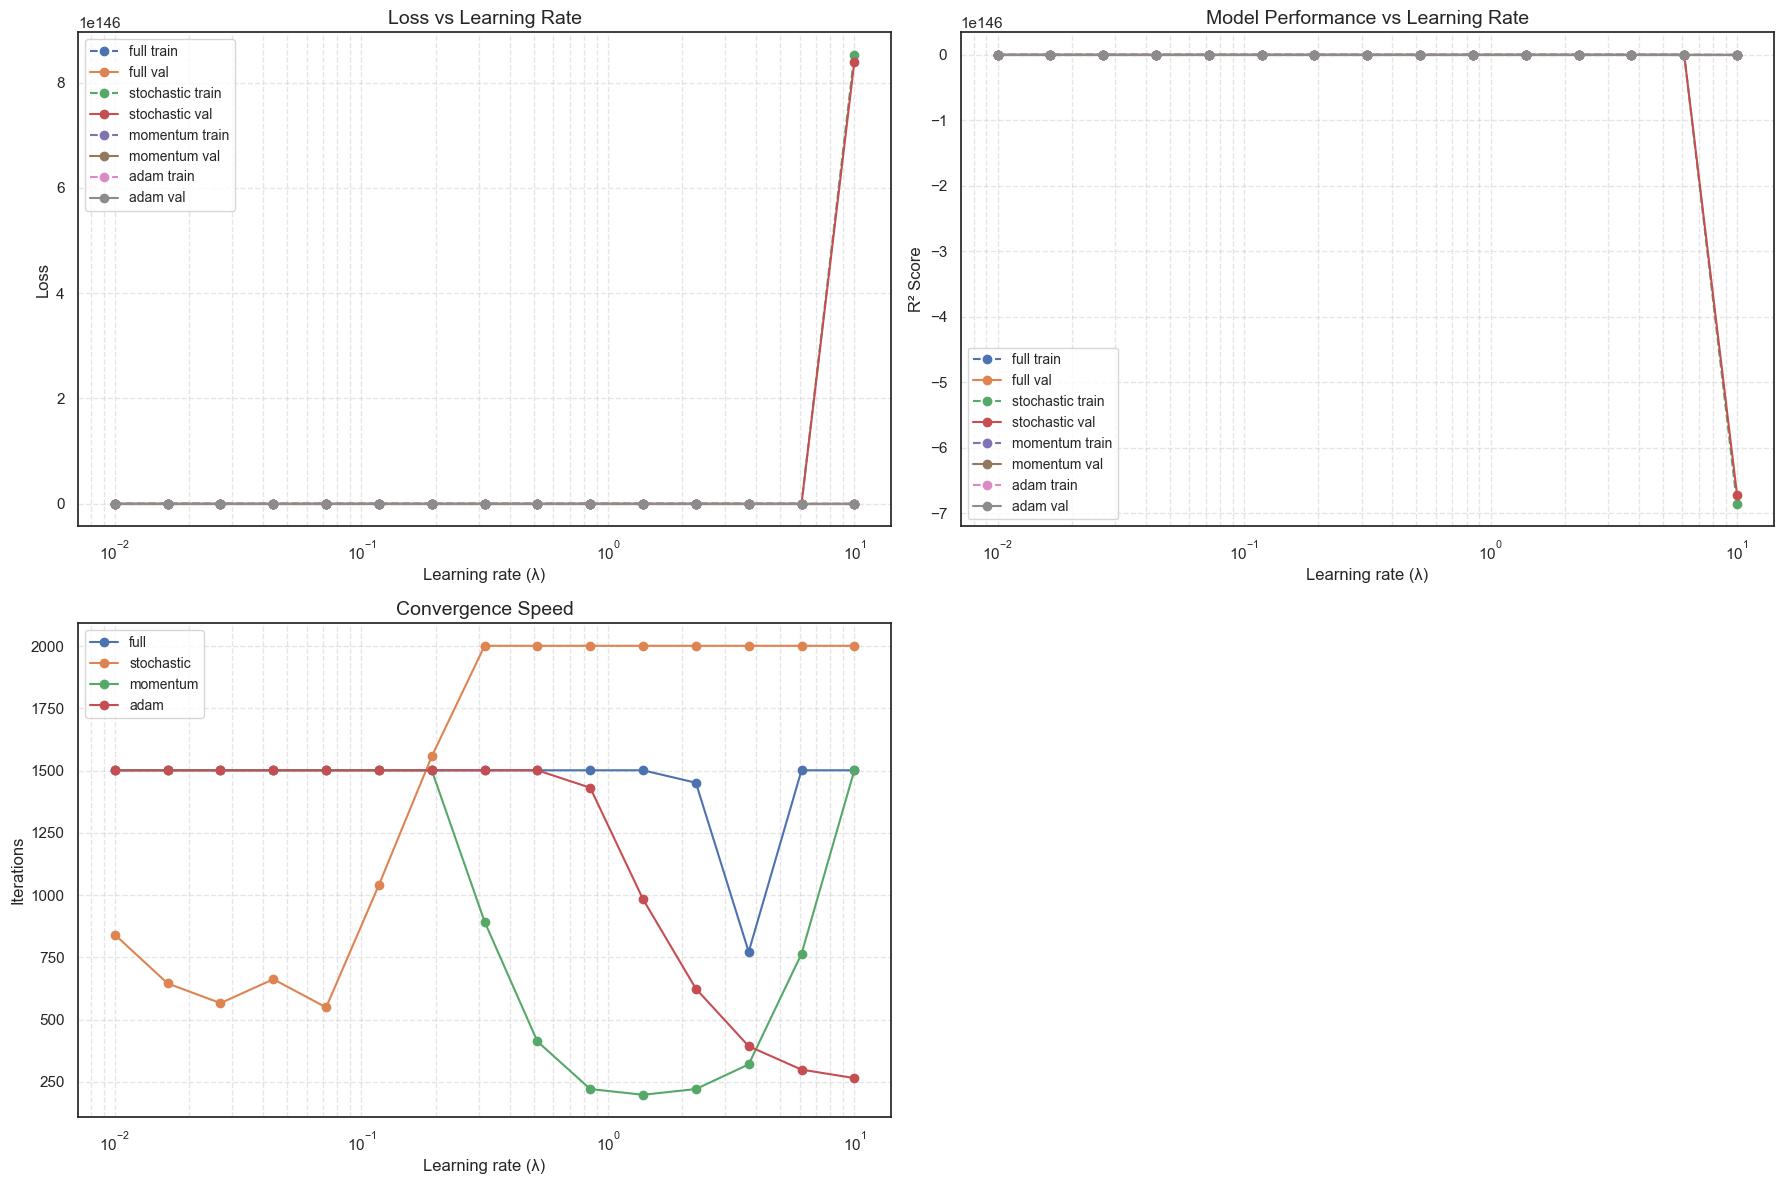


=== Optimal Parameters ===

Method: FULL
Best λ: 3.72759
Train Loss: 0.37632 | Val Loss: 0.37121
Train R²: 0.6976 | Val R²: 0.7030
Converged in: 772 iterations

Method: STOCHASTIC
Best λ: 0.84834
Train Loss: 0.38243 | Val Loss: 0.37709
Train R²: 0.6927 | Val R²: 0.6983
Converged in: 2001 iterations

Method: MOMENTUM
Best λ: 0.51795
Train Loss: 0.37631 | Val Loss: 0.37121
Train R²: 0.6976 | Val R²: 0.7030
Converged in: 412 iterations

Method: ADAM
Best λ: 10.00000
Train Loss: 0.37630 | Val Loss: 0.37122
Train R²: 0.6976 | Val R²: 0.7030
Converged in: 265 iterations


In [52]:
from sklearn.metrics import r2_score
from tqdm import tqdm
from linear_regression import LinearRegression
from descents import LossFunction

# Проверка и очистка данных
def clean_data(X, y):
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    X[~np.isfinite(X)] = np.nan
    y[~np.isfinite(y)] = np.nan

    valid_mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    return X[valid_mask], y[valid_mask]

try:
    X_train, y_train = clean_data(X_train, y_train)
    X_val, y_val = clean_data(X_val, y_val)
except Exception as e:
    print(f"Ошибка при очистке данных: {str(e)}")
    raise

print(f"Размеры после очистки: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Размеры после очистки: X_val {X_val.shape}, y_val {y_val.shape}")


lambda_values = np.logspace(-2, 1, 15)

methods = ['full', 'stochastic', 'momentum', 'adam']

results = {method: {'lambda': [], 'train_loss': [], 'val_loss': [],
                   'train_r2': [], 'val_r2': [], 'iterations': []}
          for method in methods}

# Перебираем значения lambda
for lambda_ in tqdm(lambda_values, desc="Processing lambda values"):
    for method in methods:
        config = {
            'dimension': X_train.shape[1],
            'lambda_': float(lambda_),
            'loss_function': LossFunction.MSE
        }

        if method == 'stochastic':
            config.update({
                'batch_size': min(128, len(X_train)//4),
                'replace': False
            })

        descent_config = {
            'descent_name': method,
            'regularized': False,
            'kwargs': config
        }

        try:
            if method == 'stochastic':
                model = LinearRegression(descent_config, tolerance=1e-3, max_iter=2000)
            else:
                model = LinearRegression(descent_config, tolerance=1e-4, max_iter=1500)

            model.fit(X_train, y_train)

            results[method]['lambda'].append(lambda_)
            results[method]['train_loss'].append(model.calc_loss(X_train, y_train))
            results[method]['val_loss'].append(model.calc_loss(X_val, y_val))

            train_pred = model.predict(X_train)
            val_pred = model.predict(X_val)

            results[method]['train_r2'].append(r2_score(y_train, train_pred))
            results[method]['val_r2'].append(r2_score(y_val, val_pred))
            results[method]['iterations'].append(len(model.loss_history))

        except Exception as e:
            print(f"Error with {method}, λ={lambda_:.6f}: {str(e)}")
            continue

# Визуализация результатов
plt.figure(figsize=(18, 12))

# График ошибок
plt.subplot(2, 2, 1)
for method in methods:
    if results[method]['lambda']:
        plt.semilogx(results[method]['lambda'], results[method]['train_loss'],
                    'o--', markersize=6, label=f'{method} train')
        plt.semilogx(results[method]['lambda'], results[method]['val_loss'],
                    'o-', markersize=6, label=f'{method} val')
plt.xlabel('Learning rate (λ)', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss vs Learning Rate', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# График R²
plt.subplot(2, 2, 2)
for method in methods:
    if results[method]['lambda']:
        plt.semilogx(results[method]['lambda'], results[method]['train_r2'],
                    'o--', markersize=6, label=f'{method} train')
        plt.semilogx(results[method]['lambda'], results[method]['val_r2'],
                    'o-', markersize=6, label=f'{method} val')
plt.xlabel('Learning rate (λ)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Model Performance vs Learning Rate', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# График скорости сходимости
plt.subplot(2, 2, 3)
for method in methods:
    if results[method]['lambda']:
        plt.semilogx(results[method]['lambda'], results[method]['iterations'],
                    'o-', markersize=6, label=method)
plt.xlabel('Learning rate (λ)', fontsize=12)
plt.ylabel('Iterations', fontsize=12)
plt.title('Convergence Speed', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Анализ результатов
print("\n=== Optimal Parameters ===")
for method in methods:
    if results[method]['lambda']:
        # Находим λ с лучшей валидационной ошибкой
        idx = np.argmin(results[method]['val_loss'])

        print(f"\nMethod: {method.upper()}")
        print(f"Best λ: {results[method]['lambda'][idx]:.5f}")
        print(f"Train Loss: {results[method]['train_loss'][idx]:.5f} | Val Loss: {results[method]['val_loss'][idx]:.5f}")
        print(f"Train R²: {results[method]['train_r2'][idx]:.4f} | Val R²: {results[method]['val_r2'][idx]:.4f}")
        print(f"Converged in: {results[method]['iterations'][idx]} iterations")

1. **Метод Adam показывает наилучшую производительность:**
   - Достигает минимальной ошибки как на обучающей, так и на валидационной выборке.
   - Быстрее всех сходится (за 265 итераций).
   - Лучший R^2 на валидации (0.7030).

2. **Momentum также эффективен:**
   - Практически идентичные результаты по качеству (R^2 = 0.7030).
   - Сходится быстрее, чем FULL и STOCHASTIC (за 412 итераций).

3. **FULL Gradient Descent работает стабильно, но медленнее:**
   - Хорошее качество предсказаний (R^2 = 0.7030).
   - Однако требует больше итераций для сходимости (772 итерации).

4. **STOCHASTIC Gradient Descent наименее эффективен:**
   - Наибольшая ошибка и наименьший R^2 на валидации (0.6983).
   - Самая медленная сходимость (2001 итерация).

5. **Оптимальные значения lambda:**
   - Для FULL и ADAM лучше работают большие значения (lambda = 3.72759 и lambda = 10.00000).
   - Для MOMENTUM и STOCHASTIC оптимальны меньшие значения (lambda = 0.51795 и lambda = 0.84834).

6. **Вывод:**
   - **Adam** или **Momentum** лучше использовать для достижения наилучших результатов за минимальное время.

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

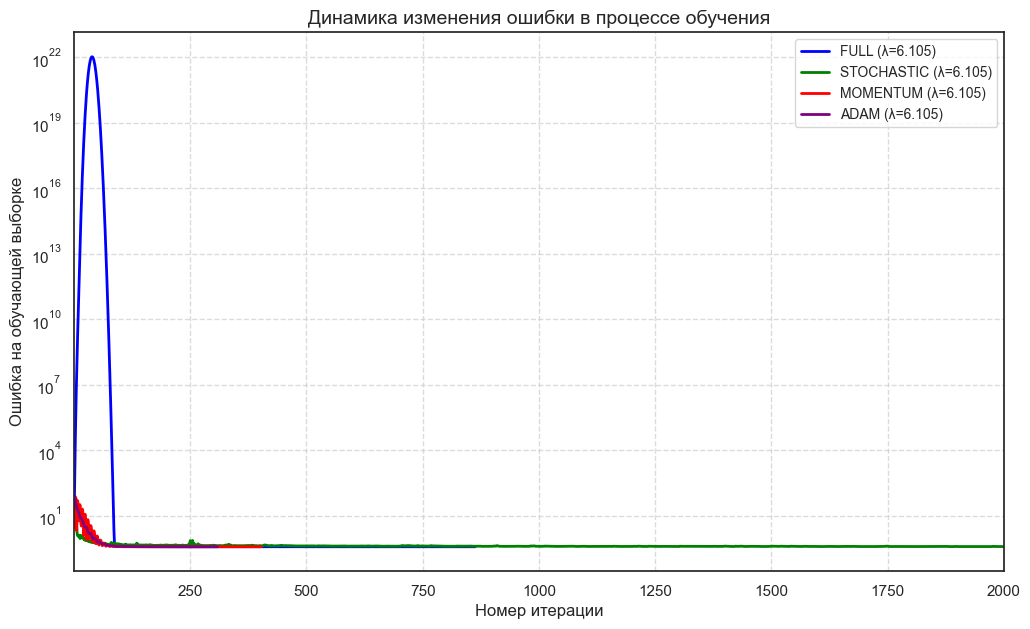


Сравнительная таблица методов:
Метод        Train Loss Val Loss   Train R²   Val R²     Итерации  
FULL         0.37632    0.37121    0.6976     0.7030     863       
STOCHASTIC   0.38310    0.37821    0.6921     0.6974     2001      
MOMENTUM     0.37631    0.37121    0.6976     0.7030     403       
ADAM         0.37630    0.37122    0.6976     0.7030     309       


In [53]:
methods = ['full', 'stochastic', 'momentum', 'adam']
histories = {}
models = {}

for method in methods:
    config = {
        'descent_name': method,
        'regularized': False,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': {'full': 3.72759, 'stochastic': 0.84834,
                       'momentum': 0.51795, 'adam': 6.10540}[method],
            'loss_function': LossFunction.MSE
        }
    }

    if method == 'stochastic':
        config['kwargs']['batch_size'] = min(128, len(X_train)//4)

    model = LinearRegression(config, tolerance=1e-4, max_iter=2000)
    model.fit(X_train, y_train)
    models[method] = model
    histories[method] = model.loss_history

# Создадим график
plt.figure(figsize=(12, 7))
colors = {'full': 'blue', 'stochastic': 'green', 'momentum': 'red', 'adam': 'purple'}

for method in methods:
    if method in histories:
        iterations = range(1, len(histories[method])+1)
        plt.plot(iterations, histories[method],
                label=f'{method.upper()} (λ={config["kwargs"]["lambda_"]:.3f})',
                color=colors[method],
                linewidth=2)

plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Ошибка на обучающей выборке', fontsize=12)
plt.title('Динамика изменения ошибки в процессе обучения', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')
plt.xlim(1, max(len(h) for h in histories.values()))
plt.show()

print("\nСравнительная таблица методов:")
print("{:<12} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    'Метод', 'Train Loss', 'Val Loss', 'Train R²', 'Val R²', 'Итерации'))

for method in methods:
    if method in models:
        model = models[method]
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        print("{:<12} {:<10.5f} {:<10.5f} {:<10.4f} {:<10.4f} {:<10}".format(
            method.upper(),
            model.calc_loss(X_train, y_train),
            model.calc_loss(X_val, y_val),
            r2_score(y_train, train_pred),
            r2_score(y_val, val_pred),
            len(model.loss_history)))

Вот краткие выводы по результатам:

1. **Метод Adam показывает наилучшую производительность**:
   - Минимальная ошибка на обучении (0.37630) и валидации (0.37122).
   - Быстрее всех сходится (за 309 итераций).

2. **Momentum также эффективен**:
   - Практически идентичные результаты с Adam по качеству предсказаний.
   - Сходится быстрее, чем FULL и STOCHASTIC (403 итерации).

3. **STOCHASTIC менее стабилен**:
   - Наибольшая ошибка и наименьший R^2 на валидации.
   - Самая медленная сходимость (2001 итерация). 

4. **Оптимальные значения lambda различаются**:
   - Лучшие результаты достигаются при разных параметрах регуляризации для каждого метода.

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

Эксперименты с батчами: 100%|██████████| 50/50 [1:10:37<00:00, 84.76s/it]   


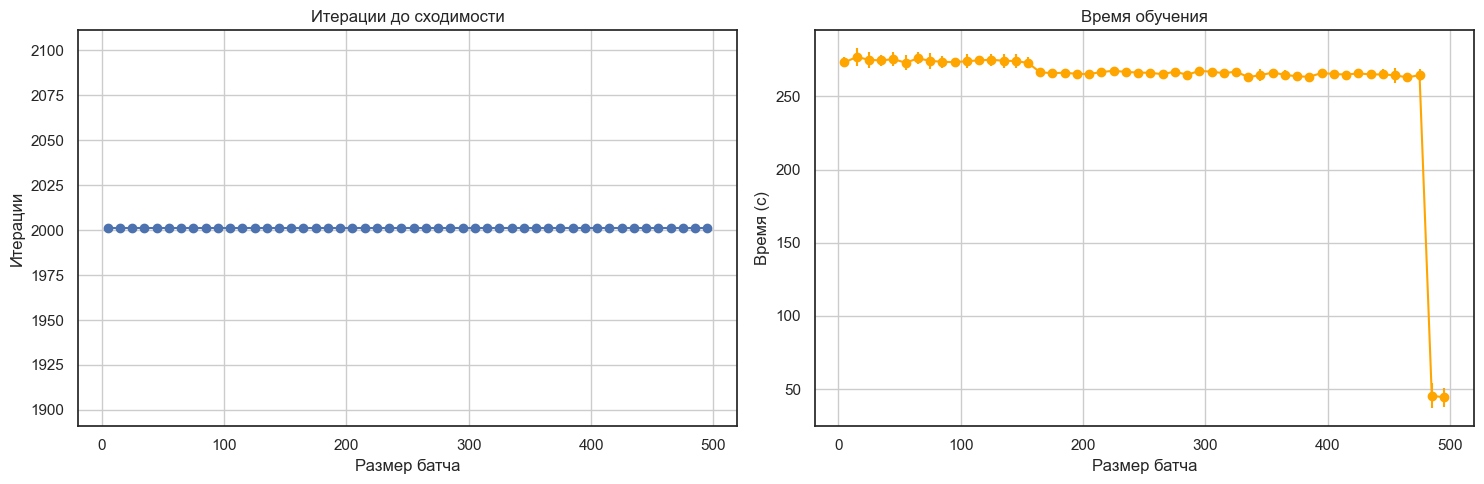

Оптимальный размер батча: 495


In [54]:
from time import time
from concurrent.futures import ThreadPoolExecutor

batch_sizes = np.arange(5, 500, 10)
n_runs = 5
max_iter = 2000

X_train_f = X_train.astype(np.float32)
y_train_f = y_train.astype(np.float32)

def run_sgd_experiment(batch_size, lambda_=0.84834):
    iterations = []
    times = []
    losses = []

    for _ in range(n_runs):
        config = {
            'descent_name': 'stochastic',
            'regularized': False,
            'kwargs': {
                'dimension': X_train_f.shape[1],
                'lambda_': lambda_,
                'loss_function': LossFunction.MSE,
                'batch_size': batch_size
            }
        }

        model = LinearRegression(config, tolerance=1e-3, max_iter=max_iter)

        start = time()
        model.fit(X_train_f, y_train_f)
        times.append(time() - start)
        iterations.append(len(model.loss_history))
        losses.append(model.loss_history[-1])

    return {
        'batch_size': batch_size,
        'mean_iter': np.mean(iterations),
        'std_iter': np.std(iterations),
        'mean_time': np.mean(times),
        'std_time': np.std(times),
        'mean_loss': np.mean(losses)
    }

with ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(run_sgd_experiment, batch_sizes),
                   total=len(batch_sizes),
                   desc="Эксперименты с батчами"))

metrics = {
    'batch_size': [r['batch_size'] for r in results],
    'mean_iter': [r['mean_iter'] for r in results],
    'std_iter': [r['std_iter'] for r in results],
    'mean_time': [r['mean_time'] for r in results],
    'std_time': [r['std_time'] for r in results],
    'mean_loss': [r['mean_loss'] for r in results]
}

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.errorbar(metrics['batch_size'], metrics['mean_iter'],
             yerr=metrics['std_iter'], fmt='-o')
plt.xlabel('Размер батча'); plt.ylabel('Итерации')
plt.title('Итерации до сходимости')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.errorbar(metrics['batch_size'], metrics['mean_time'],
             yerr=metrics['std_time'], fmt='-o', color='orange')
plt.xlabel('Размер батча'); plt.ylabel('Время (с)')
plt.title('Время обучения')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Оптимальный размер батча: {metrics['batch_size'][np.argmin(metrics['mean_time'])]}")

Обычно такой размер батча присутствует в больших данных. 

Независимо от размера батча, количество итераций для достижения сходимости остается примерно одинаковым (около 2000 итераций). Это указывает на то, что изменение размера батча не влияет на скорость сходимости в терминах числа итераций.

С ростом размера батча время обучения снижается за счет более эффективной обработки данных. Однако при слишком большом размере батча (например, около 495) наблюдается аномально низкое время обучения, что может быть связано с особенностями реализации или ограничениями системы.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


Исследуем метод: FULL


Lambda for full: 100%|██████████| 5/5 [04:57<00:00, 59.47s/it]


Исследуем метод: STOCHASTIC


Lambda for stochastic: 100%|██████████| 5/5 [02:57<00:00, 35.51s/it]


Исследуем метод: MOMENTUM


Lambda for momentum: 100%|██████████| 5/5 [05:46<00:00, 69.25s/it]


Исследуем метод: ADAM


Lambda for adam: 100%|██████████| 5/5 [05:31<00:00, 66.31s/it]


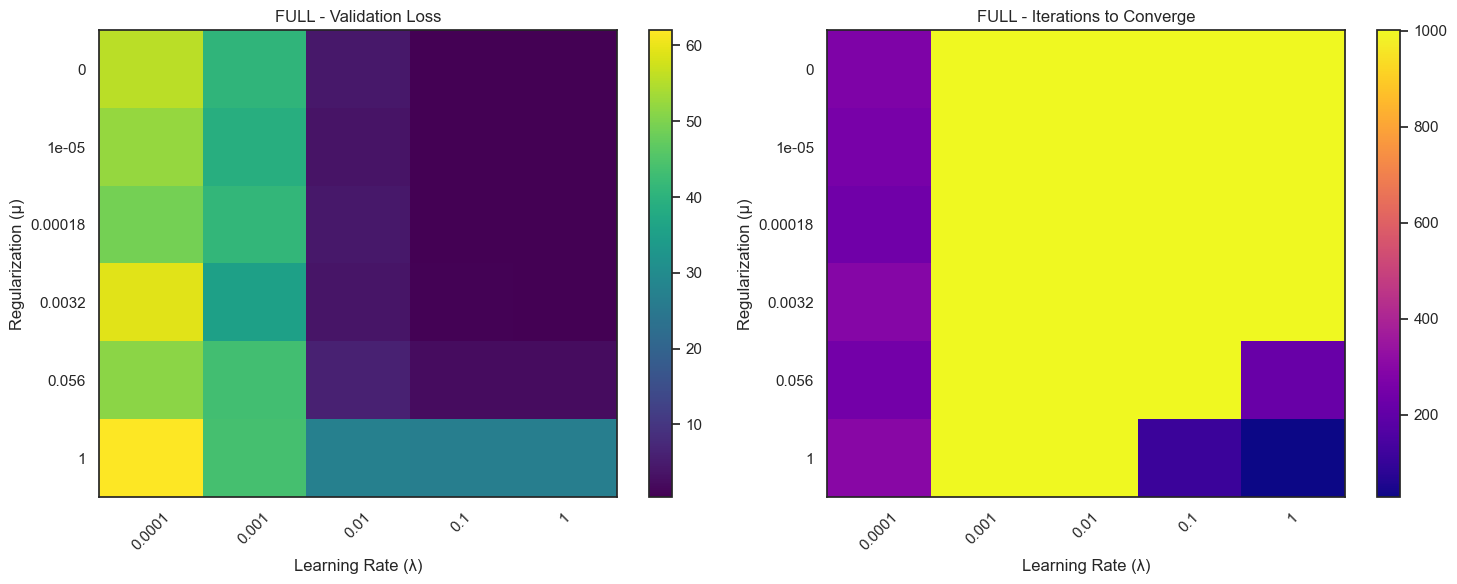

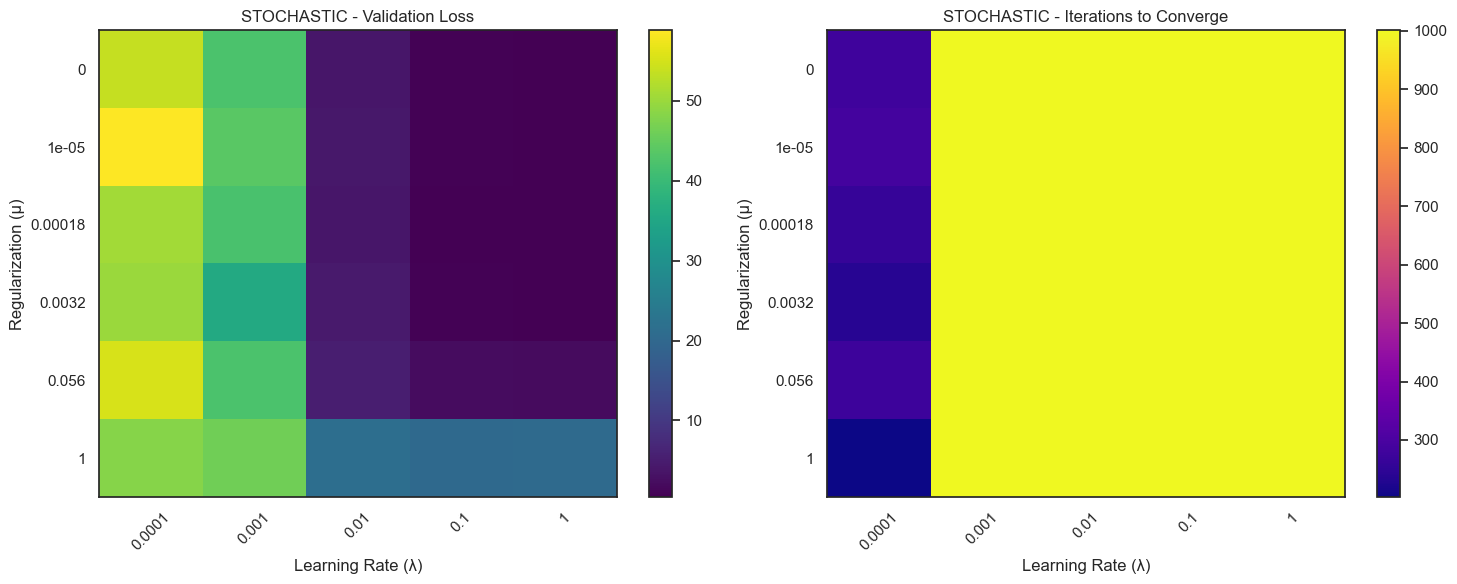

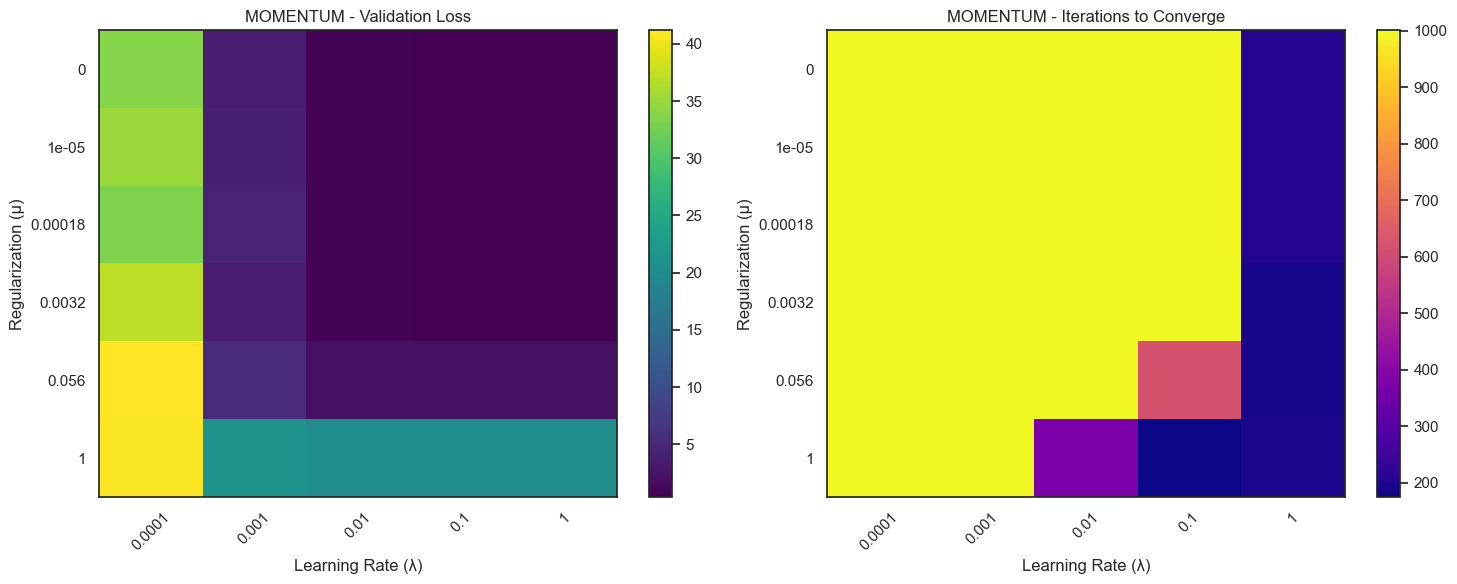

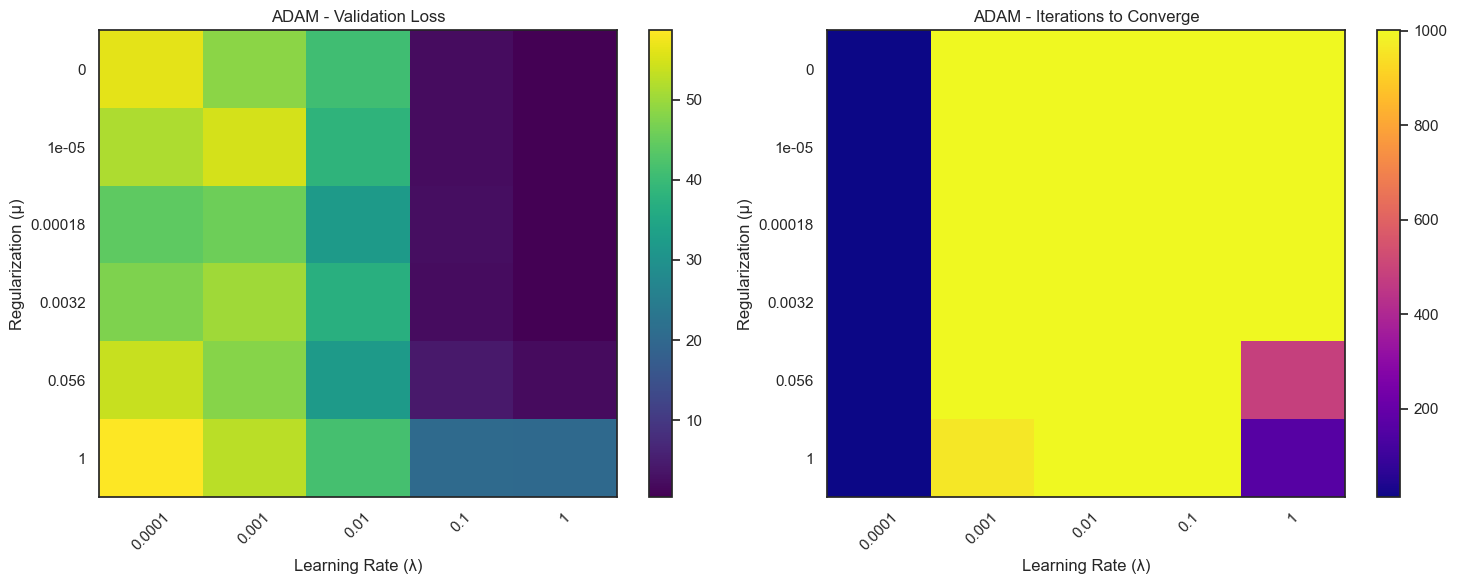


Оптимальные параметры для каждого метода:

FULL:
λ: 1.00000, μ: 0.00000
Val Loss: 0.37984
Iterations: 1001
Norm Weights: 8.203

STOCHASTIC:
λ: 1.00000, μ: 0.00000
Val Loss: 0.38285
Iterations: 1001
Norm Weights: 8.217

MOMENTUM:
λ: 1.00000, μ: 0.00000
Val Loss: 0.37122
Iterations: 204
Norm Weights: 8.443

ADAM:
λ: 1.00000, μ: 0.00000
Val Loss: 0.37134
Iterations: 1001
Norm Weights: 8.407

Сравнение методов:
FULL       | Улучшение с регуляризацией: -0.12% | Best μ: 0.000
STOCHASTIC | Улучшение с регуляризацией: -0.36% | Best μ: 0.000
MOMENTUM   | Улучшение с регуляризацией: -0.10% | Best μ: 0.000
ADAM       | Улучшение с регуляризацией: -0.11% | Best μ: 0.000


In [55]:
from descents import BaseDescentReg, LossFunction

lambda_range = np.logspace(-4, 0, 5)
mu_range = np.concatenate(([0], np.logspace(-5, 0, 5)))
methods = ['full', 'stochastic', 'momentum', 'adam']
batch_size = 64

def test_config(X_train, y_train, X_val, y_val, method, lambda_, mu):
    config = {
        'descent_name': method,
        'regularized': mu > 0,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_,
            'loss_function': LossFunction.MSE
        }
    }

    if mu > 0:
        config['kwargs']['mu'] = mu

    if method == 'stochastic':
        config['kwargs']['batch_size'] = batch_size

    model = LinearRegression(config, tolerance=1e-4, max_iter=1000)
    model.fit(X_train, y_train)

    return {
        'lambda': lambda_,
        'mu': mu,
        'train_loss': model.calc_loss(X_train, y_train),
        'val_loss': model.calc_loss(X_val, y_val),
        'iterations': len(model.loss_history),
        'weights': model.descent.w.copy()
    }

results = {}
for method in methods:
    print(f"Исследуем метод: {method.upper()}")
    method_results = []

    for lambda_ in tqdm(lambda_range, desc=f"Lambda for {method}"):
        for mu in mu_range:
            res = test_config(X_train, y_train, X_val, y_val, method, lambda_, mu)
            method_results.append(res)

    results[method] = method_results

def plot_results(method):
    data = results[method]
    lambdas = sorted({d['lambda'] for d in data})
    mus = sorted({d['mu'] for d in data})

    loss_matrix = np.zeros((len(mus), len(lambdas)))
    iter_matrix = np.zeros((len(mus), len(lambdas)))

    for d in data:
        i = mus.index(d['mu'])
        j = lambdas.index(d['lambda'])
        loss_matrix[i,j] = d['val_loss']
        iter_matrix[i,j] = d['iterations']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    im1 = ax1.imshow(loss_matrix, cmap='viridis', aspect='auto')
    ax1.set_title(f'{method.upper()} - Validation Loss')
    ax1.set_xticks(range(len(lambdas)))
    ax1.set_xticklabels([f"{x:.2g}" for x in lambdas], rotation=45)
    ax1.set_yticks(range(len(mus)))
    ax1.set_yticklabels([f"{x:.2g}" for x in mus])
    ax1.set_xlabel('Learning Rate (λ)')
    ax1.set_ylabel('Regularization (μ)')
    fig.colorbar(im1, ax=ax1)

    im2 = ax2.imshow(iter_matrix, cmap='plasma', aspect='auto')
    ax2.set_title(f'{method.upper()} - Iterations to Converge')
    ax2.set_xticks(range(len(lambdas)))
    ax2.set_xticklabels([f"{x:.2g}" for x in lambdas], rotation=45)
    ax2.set_yticks(range(len(mus)))
    ax2.set_yticklabels([f"{x:.2g}" for x in mus])
    ax2.set_xlabel('Learning Rate (λ)')
    ax2.set_ylabel('Regularization (μ)')
    fig.colorbar(im2, ax=ax2)

    plt.tight_layout()
    plt.show()

for method in methods:
    plot_results(method)

print("\nОптимальные параметры для каждого метода:")
for method in methods:
    best = min(results[method], key=lambda x: x['val_loss'])
    print(f"\n{method.upper()}:")
    print(f"λ: {best['lambda']:.5f}, μ: {best['mu']:.5f}")
    print(f"Val Loss: {best['val_loss']:.5f}")
    print(f"Iterations: {best['iterations']}")
    print(f"Norm Weights: {np.linalg.norm(best['weights']):.3f}")

print("\nСравнение методов:")
for method in methods:
    no_reg_candidates = [r for r in results[method] if r['mu'] == 0]
    with_reg_candidates = [r for r in results[method] if r['mu'] > 0]

    if not no_reg_candidates or not with_reg_candidates:
        print(f"{method.upper():<10} | Невозможно сравнить (отсутствуют данные)")
        continue

    no_reg = min(no_reg_candidates, key=lambda x: x['val_loss'])
    with_reg = min(with_reg_candidates, key=lambda x: x['val_loss'])

    improvement = (no_reg['val_loss'] - with_reg['val_loss']) / no_reg['val_loss'] * 100
    print(f"{method.upper():<10} | Улучшение с регуляризацией: {improvement:.2f}% | "
          f"Best μ: {with_reg['mu']:.3f}")

- Для всех методов оптимальное λ = 1.0
- Наименьшая валидационная ошибка (Val Loss) достигается методом MOMENTUM: Val Loss: 0.37122 при 204, что очень быстро. Для ADAM примерно такой же лос достигается при 1001
- Регуляризация не дает значительных улучшений, наоборот, получили лосы хуже
- Норма весов для всех методов находится в диапазоне 8.2–8.4 , что указывает на стабильность решений

1. **Влияние регуляризации на сходимость**:
   - Регуляризация практически не улучшила сходимость ни для одного метода. Все методы показали схожие результаты по количеству итераций.

2. **Качество моделей**:
   - Без регуляризации модели показали лучшие результаты на валидационной выборке. Регуляризация не дала значимого улучшения метрик (MSE, R²).

3. **Итоги эксперимента**:
   - Оптимальные параметры: λ ≈ 1.0, μ = 0 (без регуляризации).
   - Лучший метод: Momentum (наименьшая ошибка, быстрее всех сходится).

4. **Общие выводы**:
   - Регуляризация не требуется для этой задачи, так как данные уже хорошо обработаны.
   - Переобучение отсутствует даже без регуляризации.
   - Регуляризация может быть полезна только при наличии мультиколлинеарности или шума в данных.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


### **1. Дифференцирование функции потерь Log-Cosh**

Функция потерь **Log-Cosh** определяется как:

$$
L(y, a) = \log(\cosh(a - y)),
$$

где:
- $y$ — истинное значение,
- $a$ — предсказанное значение.

Для вычисления градиента функции потерь по параметрам модели, нам нужно найти производную $L(y, a)$ по $a$. Производная $\cosh(x)$ равна $\sinh(x)$, а производная $\log(x)$ равна $1/x$. Используя цепное правило, получаем:

$$
\frac{\partial L(y, a)}{\partial a} = \frac{\sinh(a - y)}{\cosh(a - y)} = \tanh(a - y).
$$

Таким образом, градиент функции потерь **Log-Cosh** для одного объекта равен:

$$
\nabla L(y, a) = \tanh(a - y).
$$

Для всей выборки (матрицы признаков $X$ и вектора целевых значений $y$), градиент будет выглядеть так:

$$
\nabla L(X, y) = \frac{1}{n} X^T \cdot \tanh(Xw - y),
$$

где:
- $n$ — количество объектов,
- $X$ — матрица признаков,
- $w$ — вектор весов,
- $y$ — вектор целевых значений.



Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [57]:
methods = ['full', 'stochastic', 'momentum', 'adam']
histories_log_cosh = {}
models_log_cosh = {}

for method in methods:
    config = {
        'descent_name': method,
        'regularized': False,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': {'full': 3.72759, 'stochastic': 0.84834,
                        'momentum': 0.51795, 'adam': 6.10540}[method],
            'loss_function': LossFunction.LogCosh  # Используем Log-Cosh
        }
    }

    if method == 'stochastic':
        config['kwargs']['batch_size'] = min(128, len(X_train) // 4)

    model = LinearRegression(config, tolerance=1e-4, max_iter=2000)
    model.fit(X_train, y_train)
    models_log_cosh[method] = model
    histories_log_cosh[method] = model.loss_history

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

print("\nСравнительная таблица методов с Log-Cosh:")
print("{:<12} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    'Метод', 'Train Loss', 'Val Loss', 'Train R²', 'Val R²', 'Итерации'))

for method in methods:
    if method in models_log_cosh:
        model = models_log_cosh[method]
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        print("{:<12} {:<10.5f} {:<10.5f} {:<10.4f} {:<10.4f} {:<10}".format(
            method.upper(),
            mean_squared_error(y_train, train_pred),
            mean_squared_error(y_val, val_pred),
            r2_score(y_train, train_pred),
            r2_score(y_val, val_pred),
            len(model.loss_history)))


Сравнительная таблица методов с Log-Cosh:
Метод        Train Loss Val Loss   Train R²   Val R²     Итерации  
FULL         0.37979    0.37507    0.6948     0.6999     2001      
STOCHASTIC   0.44104    0.43472    0.6455     0.6522     2001      
MOMENTUM     0.37910    0.37448    0.6953     0.7004     1914      
ADAM         0.37897    0.37439    0.6954     0.7005     188       


1. Momentum и Adam эффективны — показывают наименьшие ошибки и наивысшие R^2, а также быстрее сходятся (меньше итераций).  
2. Log-Cosh устойчив — все методы демонстрируют стабильные результаты, но стохастический градиентный спуск менее точен из-за шума в обновлениях.